# **Curso** : Python para Data Science

**Sesión 03.2**
Análisis de Asociaciones

**Profesor**:
* Ing. Cristhian Castro Chávez
* castro.ca@pucp.pe


## Data Mining for Grocery Stores
https://www.kaggle.com/roshansharma/market-basket-optimization?select=Market_Basket_Optimisation.csv


En este notebook , haremos uso del algoritmo Apriori para realizar análisis de las reglas de asociación de los comportamientos de compra de los clientes. Podemos predecir (con alta probabilidad) lo que el cliente va a comprar a continuación al observar los productos que está comprando.

Tomado y adaptado de:
https://www.kaggle.com/evrenermis/association-rule-based-learning-explained

También revisar:
https://goldinlocks.github.io/Market-Basket-Analysis-in-Python/

In [3]:
#Cargamos las librerías necesarias
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt
plt.style.use('default')
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/CristhianCastro25/Data_analytics/main/Sesion_8/Market_Basket_Optimisation.csv', header=None)
data.shape

(7501, 20)

In [5]:
#Examinamos las primeras 10 instancias del dataset
data.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# En esta ocasión cada fila correspode a una transacción (una compra)
data.loc[3]

0      turkey
1     avocado
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
Name: 3, dtype: object

In [6]:
# En esta ocasión cada fila correspode a una transacción (una compra)
data.loc[7]

0            soup
1     light cream
2         shallot
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
Name: 7, dtype: object

# Visualización de los datos

In [7]:
# 1. Almacenamos los items de cada transacción dentro de un array Numpy
total_items = []
for i in range(0, data.shape[0]):
    for j in range(0, data.shape[1]):
        total_items.append(data.values[i,j])

total_items = np.array(total_items)

In [8]:
total_items.shape

(150020,)

In [9]:
total_items

array(['shrimp', 'almonds', 'avocado', ..., 'nan', 'nan', 'nan'],
      dtype='<U32')

In [11]:
# 2. Transformamos en un dataframe de Pandas
df = pd.DataFrame(total_items, columns=["items"])
df["incident_count"] = 1 # Colocamos 1 a cada ítem para luego hacer más fácil la cuenta (suma)

In [12]:
df

,items,incident_count
0,shrimp,1
1,almonds,1
2,avocado,1
3,vegetables mix,1
4,green grapes,1
...,...,...
150015,nan,1
150016,nan,1
150017,nan,1
150018,nan,1


In [13]:
# 3. Eliminamos los NaN
indexNames = df[df['items'] == "nan" ].index
df.drop(indexNames , inplace=True)

In [15]:
# Verificamos la cantidad de elemenos distintos. Es decir la cantida de elementos únicos distintos en la tienda
df['items'].nunique()

120

In [16]:
df

,items,incident_count
0,shrimp,1
1,almonds,1
2,avocado,1
3,vegetables mix,1
4,green grapes,1
...,...,...
149981,green tea,1
150000,eggs,1
150001,frozen smoothie,1
150002,yogurt cake,1


In [17]:
# 4. Realizamos un groupby para contar las veces que un item aparece en tota. Y realizar finalmente una visualización
df_table = df.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()

In [18]:
# 5. Visualizamos los 20 productos que se compran más frecuentemente
df_table.head(20).style.background_gradient(cmap='Blues')

,items,incident_count
0,mineral water,1788
1,eggs,1348
2,spaghetti,1306
3,french fries,1282
4,chocolate,1230
5,green tea,991
6,milk,972
7,ground beef,737
8,frozen vegetables,715
9,pancakes,713


In [ ]:
df_table.head(60)

,items,incident_count
0,mineral water,1788
1,eggs,1348
2,spaghetti,1306
3,french fries,1282
4,chocolate,1230
5,green tea,991
6,milk,972
7,ground beef,737
8,frozen vegetables,715
9,pancakes,713


In [19]:
df_table["all"] = "all" # Para tener el mism origen de los datos

#Otra forma de visualizar (table heatmap)
fig = px.treemap(df_table.head(60), path=['all', "items"],
                 values='incident_count',
                 color=df_table["incident_count"].head(60),
                 hover_data=['items'],
                 color_continuous_scale='Blues',
                  )
fig.show()

# Pre-Procesamiento de Datos

Para poder implementar un algoritmo a priori y obtener conjuntos de elementos más frecuentes, tenemos que transformar nuestro conjunto de datos en una matriz 1 - 0 donde las filas son transacciones y las columnas son los productos. En esa matriz, se debe codificar "1" si el producto se compró en esa transacción y "0" se debe codificar si el producto no se compró en esa transacción. Este preprocesamiento es necesario para utilizar el algoritmo.

In [20]:
data.shape

(7501, 20)

In [21]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Transformar cada transacción en una lista separada y almacenarla dentro de un array numpy
transaction = []
for i in range(data.shape[0]):
    transaction.append([str(data.values[i,j]) for j in range(data.shape[1])])

transaction = np.array(transaction)
transaction

array([['shrimp', 'almonds', 'avocado', ..., 'frozen smoothie',
        'spinach', 'olive oil'],
       ['burgers', 'meatballs', 'eggs', ..., 'nan', 'nan', 'nan'],
       ['chutney', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ...,
       ['chicken', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ['escalope', 'green tea', 'nan', ..., 'nan', 'nan', 'nan'],
       ['eggs', 'frozen smoothie', 'yogurt cake', ..., 'nan', 'nan',
        'nan']], dtype='<U20')

In [23]:
transaction.shape

(7501, 20)

In [24]:
transaction

array([['shrimp', 'almonds', 'avocado', ..., 'frozen smoothie',
        'spinach', 'olive oil'],
       ['burgers', 'meatballs', 'eggs', ..., 'nan', 'nan', 'nan'],
       ['chutney', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ...,
       ['chicken', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ['escalope', 'green tea', 'nan', ..., 'nan', 'nan', 'nan'],
       ['eggs', 'frozen smoothie', 'yogurt cake', ..., 'nan', 'nan',
        'nan']], dtype='<U20')

In [25]:
# Primera transacción
transaction[0]

array(['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes',
       'whole weat flour', 'yams', 'cottage cheese', 'energy drink',
       'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad',
       'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie',
       'spinach', 'olive oil'], dtype='<U20')

In [26]:
# Segunda transacción
transaction[1]

array(['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan',
       'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
       'nan', 'nan', 'nan'], dtype='<U20')

In [27]:
#Transformamos a un wide dataset con 120 columnas, cada columna representa un elemento del inventario, y contiene True si el elemento esta presente en la transación

te = TransactionEncoder()
te_ary = te.fit(transaction).transform(transaction)
dataset = pd.DataFrame(te_ary, columns=te.columns_)
dataset

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
dataset.columns.to_frame(8).tail(60)

,0
hot dogs,hot dogs
ketchup,ketchup
light cream,light cream
light mayo,light mayo
low fat yogurt,low fat yogurt
magazines,magazines
mashed potato,mashed potato
mayonnaise,mayonnaise
meatballs,meatballs
melons,melons


In [33]:
dataset.shape

(7501, 121)

In [35]:
# Primera compra
dataset.iloc[0]

 asparagus           False
almonds               True
antioxydant juice     True
asparagus            False
avocado               True
                     ...  
whole wheat pasta    False
whole wheat rice     False
yams                  True
yogurt cake          False
zucchini             False
Name: 0, Length: 121, dtype: bool

In [37]:
#Esta tabla tiene almacenado los 80 productos más vendidos del total de los 120 disponibles
df_table.head(80)

,items,incident_count,all
0,mineral water,1788,all
1,eggs,1348,all
2,spaghetti,1306,all
3,french fries,1282,all
4,chocolate,1230,all
...,...,...,...
75,candy bars,73,all
76,zucchini,71,all
77,whole weat flour,70,all
78,salt,69,all


In [38]:
# Nos quedamos con una lista de los 80 productos más vendidos
first80 = df_table["items"].head(80).values

In [39]:
first80

array(['mineral water', 'eggs', 'spaghetti', 'french fries', 'chocolate',
       'green tea', 'milk', 'ground beef', 'frozen vegetables',
       'pancakes', 'burgers', 'cake', 'cookies', 'escalope',
       'low fat yogurt', 'shrimp', 'tomatoes', 'olive oil',
       'frozen smoothie', 'turkey', 'chicken', 'whole wheat rice',
       'grated cheese', 'cooking oil', 'soup', 'herb & pepper', 'honey',
       'champagne', 'fresh bread', 'salmon', 'brownies', 'avocado',
       'hot dogs', 'cottage cheese', 'tomato juice', 'butter',
       'whole wheat pasta', 'red wine', 'yogurt cake', 'light mayo',
       'ham', 'energy bar', 'energy drink', 'pepper', 'vegetables mix',
       'cereals', 'muffins', 'oil', 'french wine', 'fresh tuna',
       'strawberries', 'meatballs', 'almonds', 'parmesan cheese',
       'mushroom cream sauce', 'rice', 'protein bar', 'mint',
       'white wine', 'pasta', 'light cream', 'carrots', 'black tea',
       'tomato sauce', 'fromage blanc', 'gums', 'eggplant', 'melons

Tenemos 121 columnas en total. Comenzaremos analizando solo con los 80 elementos principales

In [40]:
dataset

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
dataset = dataset.loc[:,first80] # Extraemos solo las columnas que corresponden a los 80 top productos más vendidos*
dataset

,mineral water,eggs,spaghetti,french fries,chocolate,green tea,milk,ground beef,frozen vegetables,pancakes,...,yams,magazines,barbecue sauce,cider,nonfat milk,candy bars,zucchini,whole weat flour,salt,blueberries
0,True,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,True,False,True,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
# Nuestro dataset ahora solo contiene las columnas de los 80 productos más vendidos
dataset.columns

Index(['mineral water', 'eggs', 'spaghetti', 'french fries', 'chocolate',
       'green tea', 'milk', 'ground beef', 'frozen vegetables', 'pancakes',
       'burgers', 'cake', 'cookies', 'escalope', 'low fat yogurt', 'shrimp',
       'tomatoes', 'olive oil', 'frozen smoothie', 'turkey', 'chicken',
       'whole wheat rice', 'grated cheese', 'cooking oil', 'soup',
       'herb & pepper', 'honey', 'champagne', 'fresh bread', 'salmon',
       'brownies', 'avocado', 'hot dogs', 'cottage cheese', 'tomato juice',
       'butter', 'whole wheat pasta', 'red wine', 'yogurt cake', 'light mayo',
       'ham', 'energy bar', 'energy drink', 'pepper', 'vegetables mix',
       'cereals', 'muffins', 'oil', 'french wine', 'fresh tuna',
       'strawberries', 'meatballs', 'almonds', 'parmesan cheese',
       'mushroom cream sauce', 'rice', 'protein bar', 'mint', 'white wine',
       'pasta', 'light cream', 'carrots', 'black tea', 'tomato sauce',
       'fromage blanc', 'gums', 'eggplant', 'melons', 'ext

In [43]:
# Convertimos el dataset en una matriz de 1 y 0
def encode_units(x):
    if x == False:
        return 0
    if x == True:
        return 1

dataset = dataset.applymap(encode_units)
dataset.head(10)

,mineral water,eggs,spaghetti,french fries,chocolate,green tea,milk,ground beef,frozen vegetables,pancakes,...,yams,magazines,barbecue sauce,cider,nonfat milk,candy bars,zucchini,whole weat flour,salt,blueberries
0,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
dataset.shape

(7501, 80)

# Algoritmo A-Priori

Ahora si estamos listos para ejecutar el Algoritmo apriori

In [45]:
# Extramos los itemset más frecuentes y que cumplen la condición dada (support > 0.01)
frequent_itemsets = apriori(dataset, min_support=0.01, use_colnames=True)

# Añadimos el tamaño del itemset (elementos dentro de la compra)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.179709,(eggs),1
2,0.174110,(spaghetti),1
3,0.170911,(french fries),1
4,0.163845,(chocolate),1
...,...,...,...
252,0.010932,"(mineral water, chocolate, ground beef)",3
253,0.011065,"(mineral water, ground beef, milk)",3
254,0.011065,"(mineral water, frozen vegetables, milk)",3
255,0.010532,"(spaghetti, eggs, chocolate)",3


In [46]:
# Cuántos elementos contiene cada compra?
frequent_itemsets['length'].value_counts()

2    165
1     75
3     17
Name: length, dtype: int64

In [47]:
# Verificamos los itemset de tamaño 2. Los ordenamos por support, de mayor a menor
frequent_itemsets[frequent_itemsets['length']==2].sort_values('support', ascending=False).head(20)

,support,itemsets,length
76,0.059725,"(mineral water, spaghetti)",2
78,0.052660,"(mineral water, chocolate)",2
75,0.050927,"(mineral water, eggs)",2
80,0.047994,"(mineral water, milk)",2
81,0.040928,"(mineral water, ground beef)",2
131,0.039195,"(spaghetti, ground beef)",2
128,0.039195,"(spaghetti, chocolate)",2
105,0.036528,"(spaghetti, eggs)",2
106,0.036395,"(eggs, french fries)",2
82,0.035729,"(mineral water, frozen vegetables)",2


In [48]:
# Verificamos los itemset de tamaño 3.  Los ordenamos por support, de mayor a menor
frequent_itemsets[frequent_itemsets['length']==3].sort_values('support', ascending=False)

,support,itemsets,length
247,0.017064,"(mineral water, spaghetti, ground beef)",3
245,0.015865,"(mineral water, spaghetti, chocolate)",3
246,0.015731,"(mineral water, spaghetti, milk)",3
240,0.014265,"(spaghetti, mineral water, eggs)",3
251,0.013998,"(mineral water, chocolate, milk)",3
241,0.013465,"(mineral water, eggs, chocolate)",3
242,0.013065,"(mineral water, eggs, milk)",3
248,0.011998,"(mineral water, spaghetti, frozen vegetables)",3
249,0.011465,"(spaghetti, mineral water, pancakes)",3
253,0.011065,"(mineral water, ground beef, milk)",3


<Axes: >

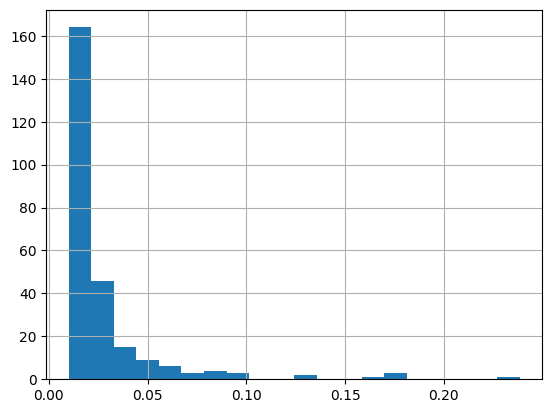

In [49]:
# Visualizamos la distribución de "support" en un histograma
frequent_itemsets['support'].hist(bins=20)

In [50]:
#Prodemos explorar rápidamente algunos itemset que cumplen con las siguientes condiciones
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.03)]

,support,itemsets,length
75,0.050927,"(mineral water, eggs)",2
76,0.059725,"(mineral water, spaghetti)",2
77,0.033729,"(mineral water, french fries)",2
78,0.052660,"(mineral water, chocolate)",2
79,0.031063,"(mineral water, green tea)",2
80,0.047994,"(mineral water, milk)",2
81,0.040928,"(mineral water, ground beef)",2
82,0.035729,"(mineral water, frozen vegetables)",2
83,0.033729,"(mineral water, pancakes)",2
105,0.036528,"(spaghetti, eggs)",2


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 3) ]

,support,itemsets,length
240,0.014265,"(eggs, mineral water, spaghetti)",3
241,0.013465,"(eggs, mineral water, chocolate)",3
242,0.013065,"(eggs, mineral water, milk)",3
243,0.010132,"(eggs, mineral water, ground beef)",3
244,0.010132,"(french fries, mineral water, spaghetti)",3
245,0.015865,"(mineral water, chocolate, spaghetti)",3
246,0.015731,"(milk, mineral water, spaghetti)",3
247,0.017064,"(ground beef, mineral water, spaghetti)",3
248,0.011998,"(mineral water, frozen vegetables, spaghetti)",3
249,0.011465,"(spaghetti, mineral water, pancakes)",3


Para empezar nuestra métrica del filtrado será el 'Lift'

In [51]:
# Ahora procedemos a crear nuestras reglas. Para eso definimos un umbral mínimo de lift (puede ser 1.2)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("lift",ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length,consequents_length
219,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,0.732460,1,1
218,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410,0.772094,1,1
288,"(mineral water, spaghetti)",(ground beef),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445,0.697788,2,1
293,(ground beef),"(mineral water, spaghetti)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902,0.727602,1,2
311,(olive oil),"(mineral water, spaghetti)",0.065858,0.059725,0.010265,0.155870,2.609786,0.006332,1.113898,0.660314,1,2
306,"(mineral water, spaghetti)",(olive oil),0.059725,0.065858,0.010265,0.171875,2.609786,0.006332,1.128021,0.656007,2,1
231,(frozen vegetables),(tomatoes),0.095321,0.068391,0.016131,0.169231,2.474464,0.009612,1.121381,0.658656,1,1
230,(tomatoes),(frozen vegetables),0.068391,0.095321,0.016131,0.235867,2.474464,0.009612,1.183930,0.639616,1,1
229,(shrimp),(frozen vegetables),0.071457,0.095321,0.016664,0.233209,2.446574,0.009853,1.179825,0.636767,1,1
228,(frozen vegetables),(shrimp),0.095321,0.071457,0.016664,0.174825,2.446574,0.009853,1.125268,0.653563,1,1


In [52]:
rules.shape

(348, 12)

De acuerdo con la tabla anterior, podemos decir fácilmente que la dependencia entre (hierba y pimienta) y (carne molida) es alta, ya que el puntaje de elevación es aproximadamente 2.5x del umbral y el puntaje de confianza es (32%)

In [53]:
# Ordenamos nuestras reglas basado en Confidence
rules.sort_values("confidence",ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length,consequents_length
268,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,0.540342,2,1
326,"(ground beef, milk)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,0.537969,2,1
320,"(chocolate, ground beef)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937,0.508837,2,1
332,"(frozen vegetables, milk)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,0.005440,1.434136,0.503555,2,1
35,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221,1,1
301,"(pancakes, spaghetti)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,0.005459,1.397557,0.488452,2,1
308,"(spaghetti, olive oil)",(mineral water),0.022930,0.238368,0.010265,0.447674,1.878079,0.004799,1.378954,0.478514,2,1
284,"(spaghetti, milk)",(mineral water),0.035462,0.238368,0.015731,0.443609,1.861024,0.007278,1.368879,0.479672,2,1
314,"(chocolate, milk)",(mineral water),0.032129,0.238368,0.013998,0.435685,1.827780,0.006340,1.349656,0.467922,2,1
290,"(spaghetti, ground beef)",(mineral water),0.039195,0.238368,0.017064,0.435374,1.826477,0.007722,1.348914,0.470957,2,1


Según la tabla anterior, se espera que los clientes que compraron (huevos, carne molida) compren (agua mineral) con una probabilidad del 50% (confianza). Los puntajes de Lift y Confianza también respaldan esa hipótesis
¡Sería mejor mantenerlos cerca para aumentar las ventas!

Dado que el producto más demandado en el conjunto de datos es el agua mineral, los resultados de la asociación están dominados principalmente por este. Por esa razón, para obtener más información, es mejor crear una tabla de confianza que excluya el agua mineral.

In [54]:
rules[~rules["consequents"].str.contains("mineral water", regex=False) &
      ~rules["antecedents"].str.contains("mineral water", regex=False)].sort_values("confidence", ascending=False).head(40)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length,consequents_length
75,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943,1,1
110,(red wine),(spaghetti),0.028130,0.174110,0.010265,0.364929,2.095966,0.005368,1.300468,0.538028,1,1
89,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186,1,1
344,"(chocolate, milk)",(spaghetti),0.032129,0.174110,0.010932,0.340249,1.954217,0.005338,1.251821,0.504495,2,1
56,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,0.499424,1,1
105,(herb & pepper),(spaghetti),0.049460,0.174110,0.016264,0.328841,1.888695,0.007653,1.230543,0.495018,1,1
219,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,0.732460,1,1
338,"(eggs, chocolate)",(spaghetti),0.033196,0.174110,0.010532,0.317269,1.822232,0.004752,1.209686,0.466715,2,1
109,(salmon),(spaghetti),0.042528,0.174110,0.013465,0.316614,1.818472,0.006060,1.208527,0.470079,1,1
99,(grated cheese),(spaghetti),0.052393,0.174110,0.016531,0.315522,1.812196,0.007409,1.206597,0.472963,1,1


Según la tabla anterior (sin el agua mineral), podemos decir que existe una relación significativa entre la carne molida y los espaguetis, el vino tinto y los espaguetis. Los puntajes de Lift y Confianza también lo respaldan.

La carne molida está en la parte superior de la tabla tanto en la tabla que contiene Agua Mineral como la que no contiene. Por esa razón, para captar nuevas asociaciones relacionadas con la carne molida e impulsar las ventas, busquemos asociaciones donde la carne molida sea antecedente.

In [55]:
rules[rules["antecedents"].str.contains("ground beef", regex=False) & rules["antecedents_length"] == 1].sort_values("confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length,consequents_length
7,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369,1,1
75,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943,1,1
129,(ground beef),(chocolate),0.098254,0.163845,0.023064,0.234735,1.432669,0.006965,1.092635,0.334908,1,1
174,(ground beef),(milk),0.098254,0.129583,0.021997,0.223881,1.727704,0.009265,1.121499,0.467090,1,1
293,(ground beef),"(mineral water, spaghetti)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902,0.727602,1,2
205,(ground beef),(frozen vegetables),0.098254,0.095321,0.016931,0.172320,1.807796,0.007565,1.093031,0.495528,1,1
218,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410,0.772094,1,1
207,(ground beef),(pancakes),0.098254,0.095054,0.014531,0.147897,1.555925,0.005192,1.062015,0.396226,1,1
214,(ground beef),(olive oil),0.098254,0.065858,0.014131,0.143826,2.183889,0.007661,1.091066,0.601168,1,1
209,(ground beef),(burgers),0.098254,0.087188,0.011998,0.122117,1.400607,0.003432,1.039787,0.317189,1,1


Como se vio el análisis anterior, la flexibilidad del algoritmo y la biblioteca mlxtend es alta, por lo que podemos investigar fácilmente diferentes aspectos y obtener nuevas asociaciones a partir de los datos. Por esa razón, las investigaciones podrían detallarse más tomando otros productos (resto de los Top80) en el cálculo o cambiando el umbral de criterios.

Sin embargo, dado que el aprendizaje de las reglas de asociación tiene un esquema iterativo, las habilidades y actividades de comprensión e interpretación de datos son realmente importantes. En ese caso, debemos dar suficiente importancia a los pasos de visualización de datos y / o limpieza de datos (si es necesario) para asegurarnos de que estamos en el camino correcto.

In [56]:
# Visualización de Reglas de Asociación
frequent_itemsets = apriori(dataset, min_support=0.01, max_len= 3,use_colnames=True)

In [57]:
frequent_itemsets.shape

(257, 2)

In [58]:
frequent_itemsets

,support,itemsets
0,0.238368,(mineral water)
1,0.179709,(eggs)
2,0.174110,(spaghetti)
3,0.170911,(french fries)
4,0.163845,(chocolate)
...,...,...
252,0.010932,"(mineral water, chocolate, ground beef)"
253,0.011065,"(mineral water, ground beef, milk)"
254,0.011065,"(mineral water, frozen vegetables, milk)"
255,0.010532,"(spaghetti, eggs, chocolate)"


In [59]:
rules = association_rules(frequent_itemsets, metric = "support",
                          min_threshold = 0.005)

In [60]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
1,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
2,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
3,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
4,(mineral water),(french fries),0.238368,0.170911,0.033729,0.141499,0.827912,-0.007011,0.965741,-0.214399


In [61]:
rules.shape

(432, 10)

In [62]:
rules.dtypes

antecedents            object
consequents            object
antecedent support    float64
consequent support    float64
support               float64
confidence            float64
lift                  float64
leverage              float64
conviction            float64
zhangs_metric         float64
dtype: object

In [63]:
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
rules['rule']=rules.index

In [64]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent,consequent,rule
0,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562,mineral water,eggs,0
1,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648,eggs,mineral water,1
2,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606,mineral water,spaghetti,2
3,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437,spaghetti,mineral water,3
4,(mineral water),(french fries),0.238368,0.170911,0.033729,0.141499,0.827912,-0.007011,0.965741,-0.214399,mineral water,french fries,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,"(spaghetti, milk)",(chocolate),0.035462,0.163845,0.010932,0.308271,1.881480,0.005122,1.208790,0.485728,spaghetti,chocolate,427
428,"(chocolate, milk)",(spaghetti),0.032129,0.174110,0.010932,0.340249,1.954217,0.005338,1.251821,0.504495,chocolate,spaghetti,428
429,(spaghetti),"(chocolate, milk)",0.174110,0.032129,0.010932,0.062787,1.954217,0.005338,1.032712,0.591224,spaghetti,chocolate,429
430,(chocolate),"(spaghetti, milk)",0.163845,0.035462,0.010932,0.066721,1.881480,0.005122,1.033494,0.560307,chocolate,spaghetti,430


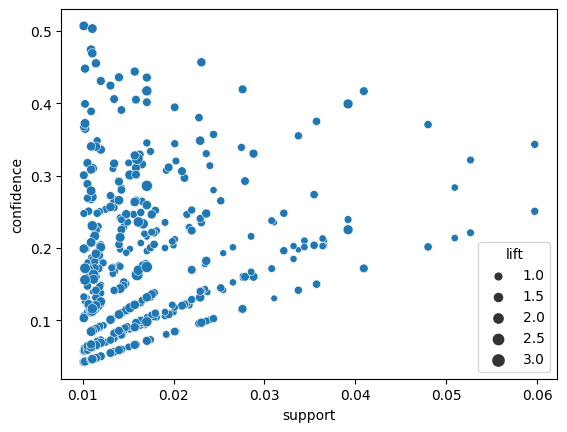

In [65]:
import seaborn as sns
sns.scatterplot(x = "support", y = "confidence",
                size = "lift", data = rules)
plt.show()

In [66]:
px.scatter(rules, x='support', y='confidence', size='lift',width=800, hover_data = ['antecedent','consequent'])

In [67]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent,consequent,rule
0,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562,mineral water,eggs,0
1,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648,eggs,mineral water,1
2,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606,mineral water,spaghetti,2
3,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437,spaghetti,mineral water,3
4,(mineral water),(french fries),0.238368,0.170911,0.033729,0.141499,0.827912,-0.007011,0.965741,-0.214399,mineral water,french fries,4


In [68]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         432 non-null    object 
 1   consequents         432 non-null    object 
 2   antecedent support  432 non-null    float64
 3   consequent support  432 non-null    float64
 4   support             432 non-null    float64
 5   confidence          432 non-null    float64
 6   lift                432 non-null    float64
 7   leverage            432 non-null    float64
 8   conviction          432 non-null    float64
 9   zhangs_metric       432 non-null    float64
 10  antecedent          432 non-null    object 
 11  consequent          432 non-null    object 
 12  rule                432 non-null    int64  
dtypes: float64(8), int64(1), object(4)
memory usage: 44.0+ KB


In [71]:
import plotly.express as px
fig = px.scatter(rules, x="support", y="confidence",size='lift',size_max=10,hover_data=['antecedent','consequent'],width=800, color='lift')
fig.show()

In [72]:
# Reglas sin considerar al agua mineral
rules_alt = rules[~rules["consequents"].str.contains("mineral water", regex=False) &
      ~rules["antecedents"].str.contains("mineral water", regex=False)]

In [73]:
rules_alt.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent,consequent,rule
60,(spaghetti),(eggs),0.174110,0.179709,0.036528,0.209801,1.167446,0.005239,1.038081,0.173666,spaghetti,eggs,60
61,(eggs),(spaghetti),0.179709,0.174110,0.036528,0.203264,1.167446,0.005239,1.036592,0.174852,eggs,spaghetti,61
62,(eggs),(french fries),0.179709,0.170911,0.036395,0.202522,1.184961,0.005681,1.039640,0.190286,eggs,french fries,62
63,(french fries),(eggs),0.170911,0.179709,0.036395,0.212949,1.184961,0.005681,1.042232,0.188267,french fries,eggs,63
64,(eggs),(chocolate),0.179709,0.163845,0.033196,0.184718,1.127397,0.003751,1.025603,0.137757,eggs,chocolate,64


In [74]:
rules_alt.isna().sum()

antecedents           0
consequents           0
antecedent support    0
consequent support    0
support               0
confidence            0
lift                  0
leverage              0
conviction            0
zhangs_metric         0
antecedent            0
consequent            0
rule                  0
dtype: int64

In [75]:
fig = px.scatter(rules_alt, x="support", y="confidence",size='lift',size_max=15,hover_data=['antecedent','consequent'],color='zhangs_metric', width=900)
fig.show()

Otra forma de visualizar las relaciones es mediante Parallel_coordinates
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.parallel_coordinates.html


In [157]:
coords = rules[['antecedent','consequent','rule','confidence','lift']]
coords.head()

,antecedent,consequent,rule,confidence,lift
0,mineral water,eggs,0,0.213647,1.188845
1,eggs,mineral water,1,0.283383,1.188845
2,mineral water,spaghetti,2,0.250559,1.439085
3,spaghetti,mineral water,3,0.343032,1.439085
4,mineral water,french fries,4,0.141499,0.827912


In [ ]:
coords.shape

(432, 3)

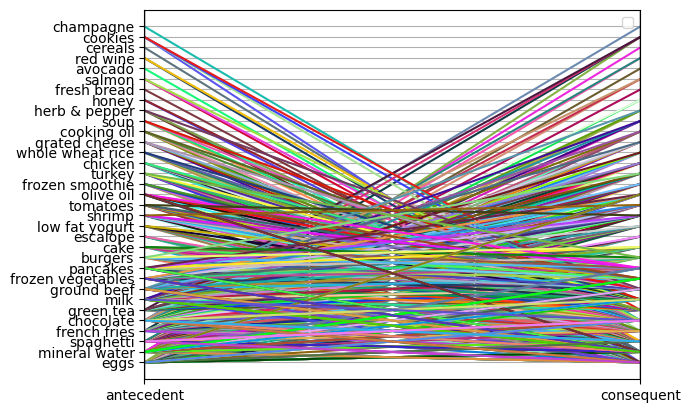

In [ ]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(coords,'rule')
plt.legend([])
plt.show()